<a href="https://colab.research.google.com/github/anyuanay/INFO371/blob/main/INFO371_Week3_4_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 371: Data Mining Applications

## Week 4: Decision Tree
### Prof. Y. An, PhD
### College of Computing and Informatics, Drexel University

# Import packages

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

# Error Rate, Entropy, Gini Index

In [ ]:
x = np.arange(0.01, 1.01, 0.01)

In [ ]:
import math
er = 1 - np.maximum(x, (1-x))
gini = (x*(1-x) + (1-x)*x)
entropy = -x * np.log2(x) - (1-x)*np.log2(1-x)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


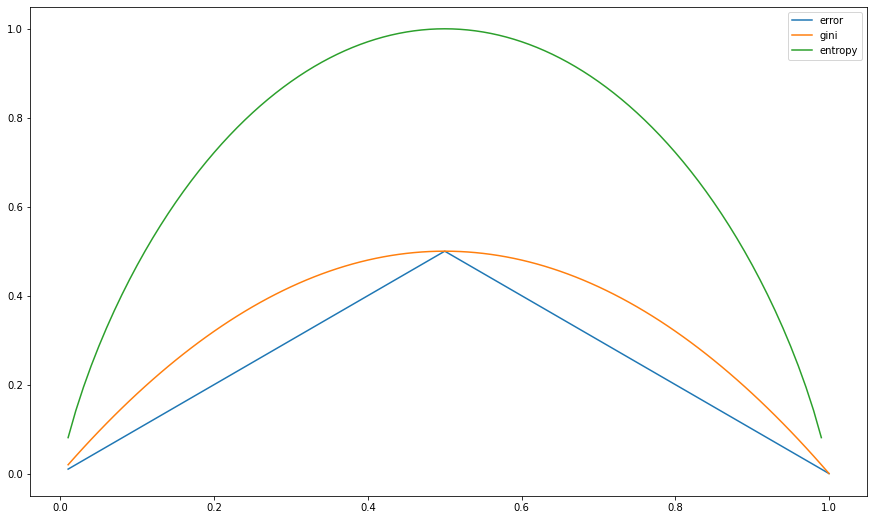

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(x, er, label="error")
plt.plot(x,gini, label="gini")
plt.plot(x, entropy, label="entropy")
plt.legend()

# Compute Information Gain
A data set with 4 triangles, 4 circles, and 2 rectangles, split into two subsets:
- 3 triangles, 2 circles, and 1 rectangle
- 1 triangle, 2 circles, and 1 rectangle

Compute the entropy, gini index, information gain, respectivly

In [ ]:
import math

In [ ]:
entropy_442 = -((4/10) * math.log2(4/10) + (4/10) * math.log2(4/10) + (2/10) * math.log2(2/10))

In [ ]:
entropy_442

1.5219280948873621

In [ ]:
gini_442 = (4/10) * (1-4/10) + (4/10) * (1-4/10) + (2/10) * (1-2/10)

In [ ]:
gini_442

0.64

In [ ]:
import math
entropy_442 = -((4/10) * math.log2(4/10) + (4/10)*math.log2(4/10)+(2/10)*math.log2(2/10))
entropy_442

1.5219280948873621

In [ ]:
gini_442 = (4/10) * (1-4/10) + (4/10) * (1-4/10) + (2/10) * (1-2/10)
gini_442

0.64

In [ ]:
entropy_321 = -((3/6)*math.log2(3/6) + (2/6)*math.log2(2/6)+(1/6)*math.log2(1/6))
entropy_321

1.4591479170272448

In [ ]:
gini_321 = (3/6*(1-3/6))+(2/6)*(1-2/6)+(1/6)*(1-1/6)
gini_321

0.6111111111111112

In [ ]:
entropy_121 = -((1/4)*math.log2(1/4) + (2/4)*math.log2(2/4)+(1/6)*math.log2(1/4))
entropy_121

1.3333333333333333

In [ ]:
gini_121 = (1/4*(1-1/4))+(2/4)*(1-2/4)+(1/4)*(1-1/4)
gini_121

0.625

In [ ]:
entropy_subsets = (6/10) * entropy_321 + (4/10) * entropy_121

In [ ]:
entropy_subsets

1.4088220835496803

In [ ]:
info_gain_entropy = entropy_442 - entropy_subsets
info_gain_entropy

0.11310601133768183

In [ ]:
info_gain_gini = gini_442 - ((6/10) * gini_321 + (4/10) * gini_121)
info_gain_gini

0.023333333333333317

# Predict play or not depending on the weather condition

In [ ]:
files.upload()

Saving weather_nominal.csv to weather_nominal (1).csv


{'weather_nominal.csv': b'outlook,temperature,humidity,windy,play\nsunny,hot,high,FALSE,no\nsunny,hot,high,TRUE,no\novercast,hot,high,FALSE,yes\nrainy,mild,high,FALSE,yes\nrainy,cool,normal,FALSE,yes\nrainy,cool,normal,TRUE,no\novercast,cool,normal,TRUE,yes\nsunny,mild,high,FALSE,no\nsunny,cool,normal,FALSE,yes\nrainy,mild,normal,FALSE,yes\nsunny,mild,normal,TRUE,yes\novercast,mild,high,TRUE,yes\novercast,hot,normal,FALSE,yes\nrainy,mild,high,TRUE,no\n'}

In [ ]:
play = pd.read_csv("weather_nominal.csv")
play

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


# Extract training attributes X and target y

In [ ]:
X = play[['outlook', 'temperature', 'humidity', 'windy']]
y = play['play']

In [ ]:
X

,outlook,temperature,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [ ]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X,y)

ValueError: ignored

# Encode string values to numbers

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder()
encoder.fit(X)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [ ]:
X_train = encoder.transform(X)

In [ ]:
y_train = y.replace({"yes":0, "no":1})
y_train

0     1
1     1
2     0
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    1
Name: play, dtype: int64

# import the DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Fit a Decision Tree

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Visualize Decision Tree

In [ ]:
!pip install -q dtreeviz

In [ ]:
from dtreeviz.trees import *

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


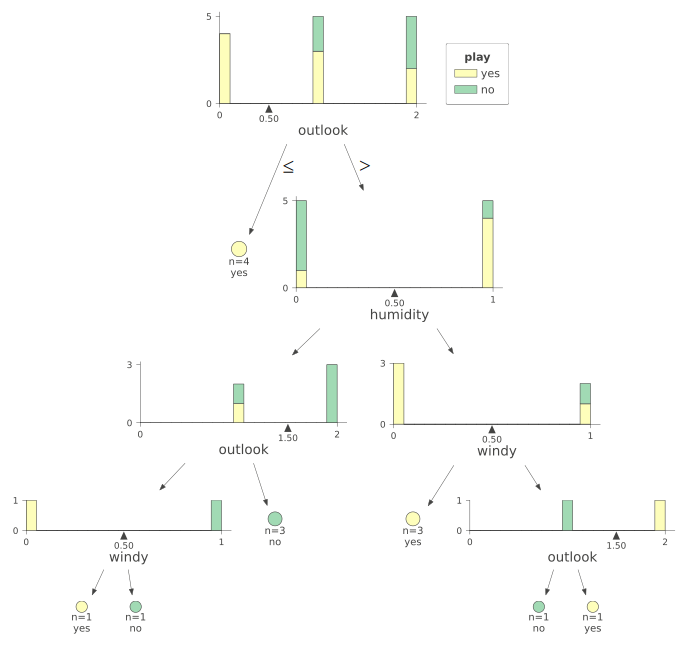

In [ ]:
viz = dtreeviz(dt,
               X_train,
               y_train,
               target_name='play',
               feature_names=X.columns,
               class_names=["yes", "no"],
               histtype= 'barstacked',
               scale=1.5)  # barstackes is default
viz

In [ ]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- class: 0



[Text(133.92000000000002, 195.696, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(100.44000000000001, 108.72, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(66.96000000000001, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(33.480000000000004, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(100.44000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(133.92000000000002, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(234.36, 108.72, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(267.84000000000003, 65.232, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 T

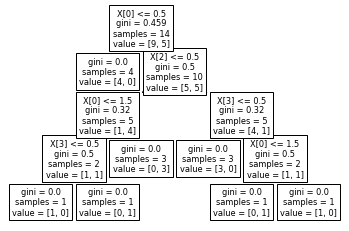

In [ ]:
from sklearn import tree
tree.plot_tree(dt)

# One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
oneHot = OneHotEncoder()
oneHot.fit(X)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
oneHot.categories_

[array(['overcast', 'rainy', 'sunny'], dtype=object),
 array(['cool', 'hot', 'mild'], dtype=object),
 array(['high', 'normal'], dtype=object),
 array([False,  True])]

In [ ]:
oneHot.transform(X).toarray()

array([[0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 1.]])

In [ ]:
oneHot.get_feature_names(['outlook', 'temperature', 'humidity', 'windy'])

array(['outlook_overcast', 'outlook_rainy', 'outlook_sunny',
       'temperature_cool', 'temperature_hot', 'temperature_mild',
       'humidity_high', 'humidity_normal', 'windy_False', 'windy_True'],
      dtype=object)

In [ ]:
X

,outlook,temperature,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [ ]:
X_1hot = pd.get_dummies(X)

In [ ]:
dt_1hot = DecisionTreeClassifier(min_samples_leaf=2)
dt_1hot.fit(X_1hot, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


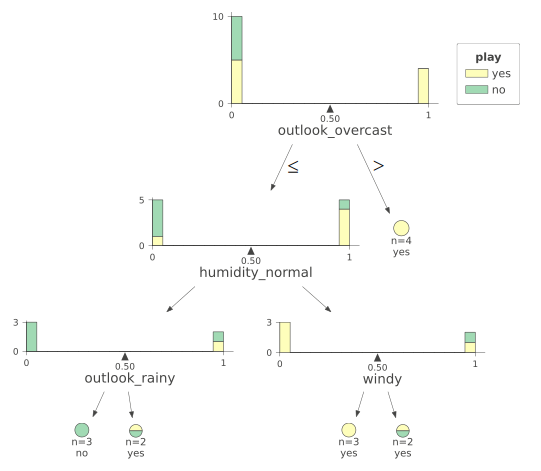

In [ ]:
viz = dtreeviz(dt_1hot,
               X_1hot,
               y_train,
               target_name='play',
               feature_names=X_1hot.columns,
               class_names=["yes", "no"],
               histtype= 'barstacked',
               scale=1.5)  # barstackes is default
viz

# Evaluate the performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
accuracy_score(y_train, dt_1hot.predict(X_1hot))

0.8571428571428571

In [ ]:
precision_recall_fscore_support(y_train, dt_1hot.predict(X_1hot))

(array([0.81818182, 1.        ]),
 array([1. , 0.6]),
 array([0.9 , 0.75]),
 array([9, 5]))

In [ ]:
accuracy_score(y_train, preds)

1.0

# Collecting the data
The data we will be using is the match history data for the NBA for the 2015-2016 season.

The website [http://basketball-reference.com](http://basketball-reference.com) contains a significant number of resources
and statistics collected from the NBA and other leagues.

To download the dataset, perform the following steps:
1. Navigate to [here](http://www.basketball-reference.com/leagues/NBA_2016_games.html) in your web browser.
2. Click Share & Export.
3. Click Get table as CSV (for Excel).
4. Copy the data, including the heading, into a text file named basketball.csv.
5. Repeat this process for the other months, except do not copy the heading.

This will give you a CSV file containing the results from each game of this season of the NBA. Your file should contain 1316 games and a total of 1317 lines in the file, including the header line.

In [ ]:
# upload the NBA file
from google.colab import files
files.upload()

Saving nba-2016.csv to nba-2016.csv


{'nba-2016.csv': b'Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS,,,Attend.,Notes\r\nTue Oct 27 2015,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,,21957,\r\nTue Oct 27 2015,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,,19187,\r\nTue Oct 27 2015,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,,19596,\r\nWed Oct 28 2015,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,,18846,\r\nWed Oct 28 2015,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,,18624,\r\nWed Oct 28 2015,7:30p,Chicago Bulls,115,Brooklyn Nets,100,Box Score,,17732,\r\nWed Oct 28 2015,7:30p,Utah Jazz,87,Detroit Pistons,92,Box Score,,18434,\r\nWed Oct 28 2015,7:30p,Indiana Pacers,99,Toronto Raptors,106,Box Score,,19800,\r\nWed Oct 28 2015,7:30p,Charlotte Hornets,94,Miami Heat,104,Box Score,,19724,\r\nWed Oct 28 2015,8:00p,New York Knicks,122,Milwaukee Bucks,97,Box Score,,18717,\r\nWed Oct 28 2015,8:00p,San Antonio Spurs,106,Oklahoma City Thunder,112,Box Score,,18203,\r\

In [ ]:
df = pd.read_csv('nba-2016.csv')
df.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,Tue Oct 27 2015,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,21957,NaN
1,Tue Oct 27 2015,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,19187,NaN
2,Tue Oct 27 2015,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,19596,NaN
3,Wed Oct 28 2015,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,NaN,18846,NaN
4,Wed Oct 28 2015,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,18624,NaN


In [ ]:
df.shape

(1316, 10)

In [ ]:
df['Visitor/Neutral'].nunique()

30

# Parse date when loading and clean the column names

In [ ]:
df = pd.read_csv('nba-2016.csv', parse_dates=["Date"])
df.columns = ["Date", "Start (ET)", "Visitor Team", "VisitorPts", \
"Home Team", "HomePts", "OT?", "Score Type", "Attend.", "Notes"]
df.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT?,Score Type,Attend.,Notes
0,2015-10-27,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,21957,NaN
1,2015-10-27,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,19187,NaN
2,2015-10-27,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,19596,NaN
3,2015-10-28,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,NaN,18846,NaN
4,2015-10-28,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,18624,NaN


In [ ]:
print(df.dtypes)

Date            datetime64[ns]
Start (ET)              object
Visitor Team            object
VisitorPts               int64
Home Team               object
HomePts                  int64
OT?                     object
Score Type              object
Attend.                  int64
Notes                   object
dtype: object


# Add a target column

In [ ]:
df["HomeWin"] = df["VisitorPts"] < df["HomePts"]
df.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,OT?,Score Type,Attend.,Notes,HomeWin
0,2015-10-27,8:00p,Cleveland Cavaliers,95,Chicago Bulls,97,Box Score,NaN,21957,NaN,True
1,2015-10-27,8:00p,Detroit Pistons,106,Atlanta Hawks,94,Box Score,NaN,19187,NaN,False
2,2015-10-27,10:30p,New Orleans Pelicans,95,Golden State Warriors,111,Box Score,NaN,19596,NaN,True
3,2015-10-28,7:00p,Washington Wizards,88,Orlando Magic,87,Box Score,NaN,18846,NaN,False
4,2015-10-28,7:30p,Philadelphia 76ers,95,Boston Celtics,112,Box Score,NaN,18624,NaN,True


# Extract the target values

In [ ]:
y_true = df['HomeWin'].values
y_true

array([ True, False,  True, ..., False,  True, False])

# What is the home team advantage in this data set?

In [ ]:
df.HomeWin.mean()

0.5942249240121581

# Predict using team names

In [ ]:
df['Home Team'].nunique()

30

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehot = OneHotEncoder()
X = onehot.fit_transform(df[['Home Team']]).todense()
X

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
dt_nba = DecisionTreeClassifier()

# Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores= cross_val_score(dt_nba, X, y_true, scoring='accuracy')

In [ ]:
scores

array([0.67045455, 0.63878327, 0.64638783, 0.63117871, 0.66920152])

In [ ]:
print("The accuracy of predicting on names: {}".format(np.mean(scores)))

The accuracy of predicting on names: 0.6512011752506048
